## Análisis Exploratorio

- Explicar los primeros pasos.
* Importar datos
* Limpiar
* Eliminar variables correlacionadas

## Entrenar el clasificador
- Decidir cuál es el mejor modelo
* A veces es cosa de prueba y error, intentar varios métodos y ver cuál se desempeña mejor.

## Evaluar el clasificador
- Este proceso puede estar muy entrelazado con el anterior
- Se debe escoger alguna función que deseamos optimizar
* Cada problema tiene su función objetivo: puede ser por ejemplo la incertidumbre de algún ajuste, la utilidad de un portafolio, el número de errores aceptados por el clasificador, etc.

In [1]:
from pandas import read_csv as read_csv, DataFrame
from pandas.plotting import scatter_matrix



In [2]:
!head -3 data/tautau02_2pipi.csv

Angle_gamma2gamma,Pt_pi,Pt_eta,Pt_pi0,Eta_pi0,Mmiss,Angle_eta2pi,Angle_pi2pi,gamma1_E,gamma2_E,pi_kid,pi_muid,pi_eid,Miss_theta,Angle_miss2thrust,M_eta,M_eta_pi,mode
0.954191,0.906995,1.52023,0.120121,0.839403,3.86712,0.855424,0.0984029,0.0772692,0.221393,5.84023e-09,1.15077e-07,1.30588e-18,0.205994,0.743478,0.578788,1.31331,5
1.65577,0.906995,1.43916,0.13675,1.0686,3.86712,0.785632,0.0984029,0.0772692,0.111542,5.84023e-09,1.15077e-07,1.30588e-18,0.205994,0.743478,0.57844,1.22348,5


In [3]:
dfsig = read_csv('data/sig02_2pipi.csv',header=0, low_memory=False)
dfsig['sig'] = 1
dfsig.head(n=10)

,Angle_gamma2gamma,Pt_pi,Pt_eta,Pt_pi0,Eta_pi0,Mmiss,Angle_eta2pi,Angle_pi2pi,gamma1_E,gamma2_E,pi_kid,pi_muid,pi_eid,Miss_theta,Angle_miss2thrust,M_eta,M_eta_pi,mode,sig
0,0.548777,1.485570,2.336620,0.132281,0.539712,2.27030,0.262898,0.162555,0.070540,0.844677,7.917540e-15,6.553190e-67,8.037140e-03,-0.631758,2.72747,0.539833,0.923154,100,1
1,1.212450,0.659440,1.078620,0.130856,-1.389000,5.67255,0.451344,0.170208,0.062091,0.212370,5.077720e-06,5.033040e-08,9.865750e-16,0.781095,2.84457,0.577964,0.991601,100,1
2,0.241887,0.472910,2.018470,0.128530,0.372384,5.47911,0.378491,0.332119,0.579379,0.489709,1.478640e-31,3.789000e-05,3.376610e-23,0.583757,2.12998,0.584936,0.822414,100,1
3,0.241887,0.716873,1.752290,0.128530,0.372384,5.47911,0.386669,0.299727,0.579379,0.489709,4.775990e-19,4.859000e-302,1.069900e-18,0.583757,2.12998,0.542998,0.822414,100,1
4,0.849549,0.142708,1.807030,0.134474,0.252396,7.80144,1.182540,0.259513,0.263872,0.100875,4.251140e-18,1.496320e-02,7.456450e-02,-0.046417,2.76789,0.525044,0.930406,100,1
5,0.849549,1.145070,0.747965,0.134474,0.252396,7.80144,0.401092,1.030010,0.263872,0.100875,2.798860e-04,6.819500e-245,2.426340e-10,-0.046417,2.76789,0.542868,0.930406,100,1
6,0.440086,1.956450,1.957190,0.134144,0.503655,3.31946,0.230895,0.407075,0.657383,0.143638,1.145920e-05,6.788370e-61,1.465590e-07,-0.251263,2.79248,0.550426,0.945267,100,1
7,0.180388,0.476300,2.296090,0.142558,-0.614604,3.73551,0.725265,0.157639,0.638885,0.980217,1.546300e-69,3.864660e-11,2.712020e-41,0.920312,1.91613,0.552716,1.143350,100,1
8,1.721320,0.503919,0.486127,0.141413,1.051090,7.45448,0.789810,1.015220,0.177135,0.049087,1.862250e-01,4.266780e-07,2.706430e-17,-0.678561,1.31641,0.524885,0.916955,100,1
9,1.721320,0.232405,0.692082,0.141413,1.051090,7.45448,1.159770,0.459327,0.177135,0.049087,5.374290e-28,2.155850e-01,5.242400e-03,-0.678561,1.31641,0.596036,0.916955,100,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1425a9160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b0c1c88>]], dtype=object)

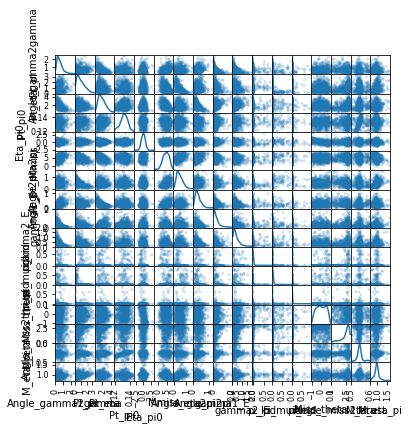

In [8]:
%matplotlib inline
train_data_features = ["Angle_gamma2gamma",
                       "Pt_pi","Pt_eta","Pt_pi0","Eta_pi0","Mmiss",
                       "Angle_eta2pi","Angle_pi2pi","gamma1_E","gamma2_E",
                       "pi_kid","pi_muid","pi_eid","Miss_theta",
                       "Angle_miss2thrust","M_eta","M_eta_pi"]
scatter_matrix(dfsig[train_data_features].sample(frac=0.01, replace=False, random_state=1), alpha=0.2, figsize=(6, 6), diagonal='kde')

In [9]:
dfbkg = read_csv('data/tautau02_2pipi.csv',header=0, low_memory=False)
dfbkg['sig'] = 0
dfbkg.head(n=10)

,Angle_gamma2gamma,Pt_pi,Pt_eta,Pt_pi0,Eta_pi0,Mmiss,Angle_eta2pi,Angle_pi2pi,gamma1_E,gamma2_E,pi_kid,pi_muid,pi_eid,Miss_theta,Angle_miss2thrust,M_eta,M_eta_pi,mode,sig
0,0.954191,0.906995,1.52023,0.120121,0.839403,3.86712,0.855424,0.098403,0.077269,0.221393,5.840230e-09,1.150770e-07,1.305880e-18,0.205994,0.743478,0.578788,1.313310,5,0
1,1.655770,0.906995,1.43916,0.136750,1.068600,3.86712,0.785632,0.098403,0.077269,0.111542,5.840230e-09,1.150770e-07,1.305880e-18,0.205994,0.743478,0.578440,1.223480,5,0
2,0.463067,1.115150,1.10282,0.129977,-0.198360,4.95911,0.399089,0.443756,0.266972,0.300436,4.943730e-39,4.278840e-02,1.715860e-18,0.815636,2.229840,0.510659,0.908964,10,0
3,1.978520,1.685110,0.89800,0.129989,0.778389,6.45951,0.675328,0.723980,0.091145,0.066375,4.170630e-08,4.264770e-31,6.818990e-10,0.121585,2.785460,0.599717,1.294650,5,0
4,0.246083,0.231089,2.19258,0.132810,0.735436,6.62566,1.083660,0.036106,0.964902,0.303395,4.345220e-71,3.386240e-01,2.453410e-06,-0.482288,2.877580,0.580623,1.116970,8,0
5,0.407479,1.867280,1.95681,0.134707,-0.348131,1.71929,0.463899,0.151393,0.486510,0.227768,3.171980e-02,2.013610e-07,1.183780e-08,0.679844,3.032020,0.570382,1.453140,8,0
6,1.080380,2.704450,1.31382,0.121731,0.166940,3.01120,0.056668,0.379675,0.106971,0.130932,1.995340e-06,2.315110e-49,7.883440e-11,0.400504,2.725360,0.570150,1.008000,8,0
7,0.556101,2.229970,2.33507,0.138972,-0.642773,-2.05232,0.146637,0.212145,0.179458,0.357110,6.062440e-01,9.267300e-25,7.204360e-14,0.531468,3.075660,0.564179,0.891584,5,0
8,0.556101,0.808083,3.76367,0.138972,-0.642773,-2.05232,0.249839,0.104815,0.179458,0.357110,1.025560e-20,1.068390e-07,1.493230e-19,0.531468,3.075660,0.582949,0.891584,5,0
9,0.567414,1.242590,1.06936,0.142719,0.311948,5.74755,0.673075,0.901673,0.151926,0.427772,1.694310e-25,3.120450e-21,9.797270e-09,-0.519279,2.816960,0.594350,1.345450,8,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3b4e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127d4a2e8>]], dtype=object)

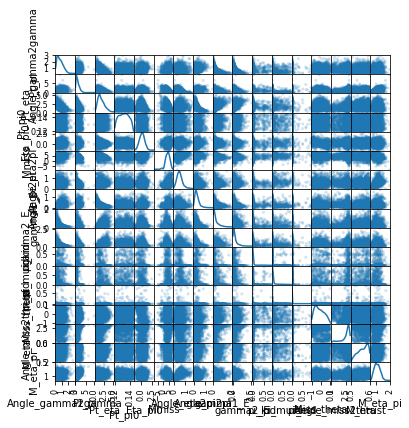

In [12]:
scatter_matrix(dfbkg[train_data_features].sample(frac=0.01, replace=False, random_state=1), alpha=0.2, figsize=(6, 6), diagonal='kde')



In [11]:
dfsig.describe()


,Angle_gamma2gamma,Pt_pi,Pt_eta,Pt_pi0,Eta_pi0,Mmiss,Angle_eta2pi,Angle_pi2pi,gamma1_E,gamma2_E,pi_kid,pi_muid,pi_eid,Miss_theta,Angle_miss2thrust,M_eta,M_eta_pi,mode,sig
count,74088.000000,74088.000000,74088.000000,74088.000000,74088.000000,74088.000000,74088.000000,74088.000000,74088.000000,74088.000000,7.408800e+04,7.408800e+04,7.408800e+04,74088.000000,74088.000000,74088.000000,74088.000000,74088.0,74088.0
mean,0.585288,0.991311,1.884607,0.132153,0.014668,4.469772,0.471652,0.302975,0.358744,0.373608,2.904594e-02,3.744774e-02,1.423606e-02,-0.005136,2.307175,0.546512,0.978095,100.0,1.0
std,0.330470,0.654250,0.795300,0.005172,0.586753,1.777900,0.245133,0.190998,0.304587,0.308325,1.131482e-01,1.353822e-01,9.095012e-02,0.539680,0.784413,0.015094,0.132472,0.0,0.0
min,0.082468,0.090553,0.058286,0.120000,-3.630590,-29.082200,0.001707,0.001183,0.038153,0.040206,0.000000e+00,0.000000e+00,1.244010e-311,-0.999938,0.006454,0.500010,0.643377,100.0,1.0
25%,0.340304,0.481303,1.275168,0.128749,-0.419557,3.217777,0.298463,0.171672,0.142409,0.153369,2.701087e-33,9.083990e-44,6.784420e-19,-0.461796,2.005215,0.539801,0.916756,100.0,1.0
50%,0.509750,0.846072,1.764245,0.132448,0.009670,4.552145,0.428694,0.261462,0.264253,0.278541,9.664195e-17,4.111235e-17,5.253105e-13,-0.011174,2.645595,0.545071,0.974115,100.0,1.0
75%,0.749209,1.363430,2.392375,0.135702,0.446249,5.802995,0.604155,0.388466,0.478770,0.495590,1.090622e-07,3.857420e-07,5.043260e-08,0.455784,2.863320,0.550021,1.023012,100.0,1.0
max,2.820440,15.817400,4.898390,0.144995,4.269510,9.209340,2.158250,1.965820,2.674680,2.811160,7.996500e-01,9.499110e-01,9.498950e-01,0.999975,3.140270,0.599996,3.107260,100.0,1.0


In [6]:
dfbkg.describe()

,Angle_gamma2gamma,Pt_pi,Pt_eta,Pt_pi0,Eta_pi0,Mmiss,Angle_eta2pi,Angle_pi2pi,gamma1_E,gamma2_E,pi_kid,pi_muid,pi_eid,Miss_theta,Angle_miss2thrust,M_eta,M_eta_pi,mode,sig
count,204790.000000,204790.000000,204790.000000,204790.000000,204790.000000,204790.000000,204790.000000,204790.000000,204790.000000,204790.000000,2.047900e+05,2.047900e+05,2.047900e+05,204790.000000,204790.000000,204790.000000,204790.000000,204790.000000,204790.0
mean,0.766520,1.161043,1.828158,0.132301,0.290829,4.024445,0.521691,0.308899,0.297186,0.328681,2.831134e-02,5.811951e-02,5.289864e-03,-0.159121,2.401268,0.560247,1.102102,9.808706,0.0
std,0.438653,0.799361,0.812208,0.006816,0.578636,1.869376,0.245832,0.202559,0.300048,0.297143,1.107356e-01,1.656935e-01,4.860843e-02,0.508166,0.746431,0.027050,0.204585,6.249419,0.0
min,0.078114,0.088784,0.019736,0.120000,-4.943190,-33.287600,0.001502,0.000037,0.037963,0.038206,0.000000e+00,0.000000e+00,9.212348e-320,-0.999999,0.004573,0.500001,0.641517,3.000000,0.0
25%,0.406066,0.567213,1.210792,0.126649,-0.101100,2.846518,0.351994,0.169044,0.095987,0.130588,4.129328e-23,2.088425e-22,3.137285e-17,-0.582518,2.237548,0.539947,0.950990,8.000000,0.0
50%,0.687974,0.993667,1.696260,0.132379,0.294018,4.124500,0.494387,0.264296,0.193135,0.232670,3.474325e-12,1.535100e-11,3.390455e-12,-0.218472,2.715440,0.563975,1.089640,8.000000,0.0
75%,1.062918,1.584625,2.324565,0.137857,0.674271,5.342170,0.657085,0.399170,0.383539,0.421722,6.131250e-06,5.176600e-04,5.390768e-08,0.227483,2.892150,0.583598,1.241375,8.000000,0.0
max,2.980500,61.822500,7.089000,0.145000,5.214530,8.964960,2.312850,2.438930,2.792400,2.983280,7.999560e-01,8.999760e-01,8.993700e-01,0.999922,3.140400,0.600000,5.213550,39.000000,0.0


Text(0.5,0,'pt(pi) (GeV)')

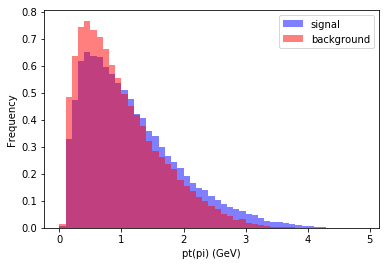

In [82]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure();
Pt_pi = np.arange(0,5,0.1)
df_training = dfsig.sample(frac=0.7, replace=False, random_state=1)
df_testing = dfsig.drop(df_training.index)
df_btrn = dfbkg.sample(frac=0.7, replace=False, random_state=1)
df_btst = dfbkg.drop(df_btrn.index)
df_training = df_training.append(df_btrn, ignore_index=True).dropna(axis=0, how='all')
df_testing = df_testing.append(df_btst, ignore_index=True).dropna(axis=0, how='all')
df_sig = df_training[df_training['sig']==1] 
df_bkg = df_training[df_training['sig']==0]
df_bkg['Pt_pi'].plot.hist(bins=Pt_pi,color='b',alpha=0.5,label='signal',normed=True)
df_sig['Pt_pi'].plot.hist(bins=Pt_pi,color='r',alpha=0.5,label='background',normed=True)
plt.legend(loc='upper right')
plt.xlabel('pt(pi) (GeV)')

Text(0.5,0,'pt(eta) (GeV)')

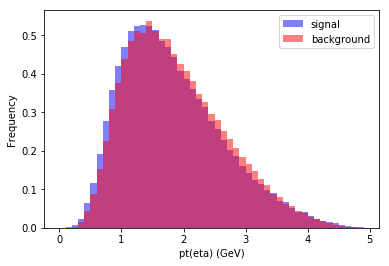

In [83]:
Pt_eta = np.arange(0,5,0.1)
df_bkg['Pt_eta'].plot.hist(bins=Pt_eta,color='b',alpha=0.5,label='signal',normed=True)
df_sig['Pt_eta'].plot.hist(bins=Pt_eta,color='r',alpha=0.5,label='background',normed=True)
plt.legend(loc='upper right')
plt.xlabel('pt(eta) (GeV)')

Text(0.5,0,'Angle pi-eta (rad)')

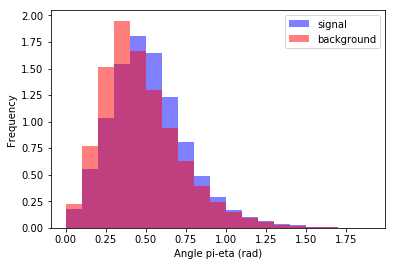

In [84]:
Angle_eta2pi = np.arange(0,2,0.1)
df_bkg['Angle_eta2pi'].plot.hist(bins=Angle_eta2pi,color='b',alpha=0.5,label='signal',normed=True)
df_sig['Angle_eta2pi'].plot.hist(bins=Angle_eta2pi,color='r',alpha=0.5,label='background',normed=True)
plt.legend(loc='upper right')
plt.xlabel('Angle pi-eta (rad)')

Text(0.5,0,'Angle pi-eta (rad)')

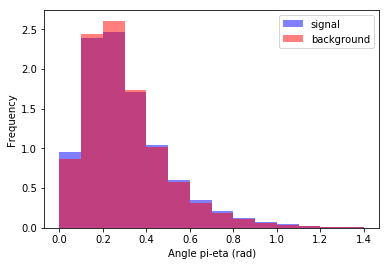

In [85]:
Angle_pi2pi = np.arange(0,1.5,0.1)
df_bkg['Angle_pi2pi'].plot.hist(bins=Angle_pi2pi,color='b',alpha=0.5,label='signal',normed=True)
df_sig['Angle_pi2pi'].plot.hist(bins=Angle_pi2pi,color='r',alpha=0.5,label='background',normed=True)
plt.legend(loc='upper right')
plt.xlabel('Angle pi-eta (rad)')

In [11]:
from sklearn import pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


train_data_features = ["Angle_gamma2gamma",
                       "Pt_pi","Pt_eta","Pt_pi0","Eta_pi0","Mmiss",
                       "Angle_eta2pi","Angle_pi2pi","gamma1_E","gamma2_E",
                       "pi_kid","pi_muid","pi_eid","Miss_theta",
                       "Angle_miss2thrust","M_eta","M_eta_pi"]

forest = RandomForestClassifier(n_estimators=1000)
pipe = pipeline.Pipeline([('forest', forest)])
df_training.reset_index(inplace=True, drop=True)
X = df_training[train_data_features].values.tolist()
y = df_training["sig"].tolist()
forest.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

X

In [77]:
df_test = df_testing.sample(frac=0.05, replace=False, random_state=1)
X_test = df_test[train_data_features].values.tolist()
y_test = df_test["sig"].tolist()
forest.score(X_test,y_test)


0.88118575185273729

In [78]:
f = lambda x: forest.predict_proba([x])[0][0]
r = list(map(lambda x: f(x),X_test))


In [79]:
df_test['rf'] = r

In [80]:
df_test

,Angle_gamma2gamma,Pt_pi,Pt_eta,Pt_pi0,Eta_pi0,Mmiss,Angle_eta2pi,Angle_pi2pi,gamma1_E,gamma2_E,pi_kid,pi_muid,pi_eid,Miss_theta,Angle_miss2thrust,M_eta,M_eta_pi,mode,sig,rf
15437,0.397562,0.695964,1.529010,0.123399,-0.299294,5.417560,0.314184,0.297318,0.270244,0.361229,5.939580e-25,3.453530e-33,5.738690e-21,0.240216,2.193300,0.588716,0.825746,100,1,0.648
15255,0.857138,0.826741,2.319490,0.132412,-0.499958,3.753650,0.505297,0.232909,0.376266,0.067455,4.940850e-38,9.309670e-20,9.166400e-09,0.954197,2.260780,0.545799,1.095900,100,1,0.398
43497,0.195681,0.651260,3.128840,0.141917,-0.620764,2.128080,0.575414,0.111752,1.057400,0.499021,1.292060e-22,3.415480e-01,2.203550e-19,0.249088,2.701190,0.510281,1.136870,8,0,0.970
74036,1.303270,2.018510,1.240080,0.143521,0.549186,3.759240,0.403554,0.470802,0.071775,0.195054,3.799220e-03,3.310870e-20,8.782090e-14,-0.945179,2.212720,0.558692,1.151050,5,0,0.960
193,0.725717,0.683732,1.033420,0.137274,0.705116,6.246390,0.129657,0.381109,0.109139,0.342616,2.473850e-13,6.048970e-136,1.516920e-07,-0.880296,2.859710,0.550232,0.785015,100,1,0.564
31311,0.224448,1.627010,2.870630,0.130925,-0.128544,3.013700,0.033740,0.324747,0.769696,0.443934,1.208640e-04,1.670760e-28,1.654280e-12,0.088289,3.009650,0.560987,0.742232,24,0,0.406
20625,2.088600,0.480608,0.906128,0.132139,-0.901078,6.181820,0.120718,0.412003,0.085937,0.067955,2.815710e-36,2.060440e-06,1.204050e-16,0.280956,1.335920,0.554519,0.734193,100,1,0.626
15095,0.984796,0.713609,1.818400,0.136187,-0.004740,5.462410,0.641040,0.372414,0.258541,0.080249,1.018350e-26,2.599460e-114,1.593380e-21,-0.138353,1.817280,0.549811,1.006630,100,1,0.060
46785,0.884961,1.456210,1.246160,0.123139,0.066925,5.805700,0.421088,0.327163,0.100726,0.205271,9.188000e-02,4.684750e-01,2.082440e-10,0.523829,2.917090,0.593300,1.163340,24,0,0.990
69064,0.310949,1.403090,1.787330,0.128899,0.625622,3.061180,0.168717,0.100904,0.683519,0.253437,1.033180e-01,1.140440e-11,7.697300e-04,-0.684089,2.855880,0.538687,0.809964,24,0,0.265


Text(0.5,0,'Random Forest value')

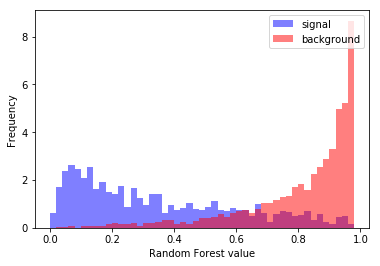

In [87]:
RF = np.arange(0,1,0.02)
df_test[df_test['sig']==1]['rf'].plot.hist(bins=RF,color='b',alpha=0.5,label='signal',normed=True)
df_test[df_test['sig']==0]['rf'].plot.hist(bins=RF,color='r',alpha=0.5,label='background',normed=True)
plt.legend(loc='upper right')
plt.xlabel('Random Forest value')

In [95]:
from pandas import cut
htest_sig = cut(df_test[df_test['sig']==1]['rf'], bins=RF)
htest_bkg = cut(df_test[df_test['sig']==0]['rf'], bins=RF)
htest_bkg.value_counts()

(0.96, 0.98]    361
(0.94, 0.96]    240
(0.92, 0.94]    202
(0.9, 0.92]     151
(0.88, 0.9]     127
(0.86, 0.88]    110
(0.84, 0.86]     97
(0.8, 0.82]      75
(0.78, 0.8]      74
(0.82, 0.84]     72
(0.76, 0.78]     59
(0.74, 0.76]     57
(0.7, 0.72]      48
(0.72, 0.74]     47
(0.68, 0.7]      42
(0.66, 0.68]     34
(0.62, 0.64]     32
(0.6, 0.62]      31
(0.64, 0.66]     28
(0.58, 0.6]      27
(0.54, 0.56]     23
(0.52, 0.54]     20
(0.56, 0.58]     19
(0.48, 0.5]      17
(0.5, 0.52]      17
(0.38, 0.4]      14
(0.36, 0.38]     13
(0.46, 0.48]     13
(0.26, 0.28]     10
(0.42, 0.44]      9
(0.4, 0.42]       9
(0.34, 0.36]      9
(0.32, 0.34]      9
(0.3, 0.32]       9
(0.22, 0.24]      8
(0.2, 0.22]       8
(0.44, 0.46]      7
(0.18, 0.2]       6
(0.12, 0.14]      5
(0.24, 0.26]      5
(0.16, 0.18]      4
(0.06, 0.08]      4
(0.28, 0.3]       3
(0.1, 0.12]       3
(0.14, 0.16]      2
(0.04, 0.06]      2
(0.08, 0.1]       1
(0.02, 0.04]      1
(0.0, 0.02]       0
Name: rf, dtype: int

In [96]:
htest_sig.value_counts()

(0.06, 0.08]    60
(0.08, 0.1]     58
(0.04, 0.06]    56
(0.12, 0.14]    56
(0.1, 0.12]     48
(0.16, 0.18]    44
(0.26, 0.28]    41
(0.02, 0.04]    40
(0.22, 0.24]    38
(0.18, 0.2]     38
(0.14, 0.16]    37
(0.32, 0.34]    32
(0.2, 0.22]     31
(0.34, 0.36]    31
(0.52, 0.54]    26
(0.28, 0.3]     26
(0.3, 0.32]     25
(0.44, 0.46]    24
(0.38, 0.4]     24
(0.66, 0.68]    23
(0.58, 0.6]     21
(0.42, 0.44]    20
(0.24, 0.26]    20
(0.5, 0.52]     19
(0.48, 0.5]     18
(0.54, 0.56]    17
(0.62, 0.64]    17
(0.4, 0.42]     16
(0.0, 0.02]     16
(0.76, 0.78]    16
(0.74, 0.76]    16
(0.82, 0.84]    16
(0.56, 0.58]    16
(0.36, 0.38]    15
(0.46, 0.48]    15
(0.6, 0.62]     15
(0.72, 0.74]    14
(0.68, 0.7]     13
(0.64, 0.66]    12
(0.8, 0.82]     12
(0.94, 0.96]    11
(0.86, 0.88]    11
(0.84, 0.86]    10
(0.92, 0.94]    10
(0.78, 0.8]      9
(0.7, 0.72]      6
(0.88, 0.9]      6
(0.9, 0.92]      4
(0.96, 0.98]     4
Name: rf, dtype: int64

Text(0,0.5,'Pureza por bin (Fraccion de señal en cada bin)')

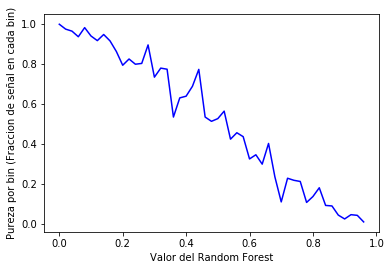

In [97]:
purity_by_bin = []
for g in range(0,len(htest_sig.value_counts())):
    sum_g_b = htest_sig.value_counts()[g] + htest_bkg.value_counts()[g]
    if sum_g_b !=0:
        purity_by_bin.append(1.0*htest_sig.value_counts()[g]/sum_g_b)
    else:
        purity_by_bin.append(1.0*htest_sig.value_counts()[g])
plt.plot(RF[:(len(purity_by_bin))], purity_by_bin, 'b')
plt.xlabel('Valor del Random Forest')
plt.ylabel('Pureza por bin (Fraccion de señal en cada bin)')

Text(0,0.5,'Pureza por bin (Fraccion de señal en cada bin)')

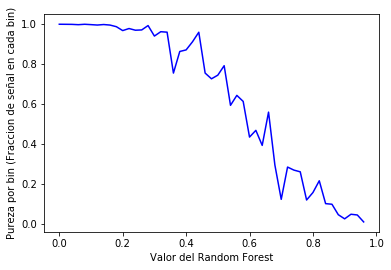

In [104]:
import math
significance_by_bin = []
for g in range(0,len(htest_sig.value_counts())):
    sum_g_b = htest_sig.value_counts()[g]**2 + htest_bkg.value_counts()[g]**2
    if sum_g_b !=0:
        significance_by_bin.append(1.0*htest_sig.value_counts()[g]/math.sqrt(sum_g_b))
    else:
        significance_by_bin.append(1.0*htest_sig.value_counts()[g])
plt.plot(RF[:(len(significance_by_bin))], significance_by_bin, 'b')
plt.xlabel('Valor del Random Forest')
plt.ylabel('Pureza por bin (Fraccion de señal en cada bin)')